In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()


11

In [4]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [5]:
df.drop("customerID", axis=1, inplace=True)


In [6]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [7]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [8]:
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [9]:
scaler = StandardScaler()

numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [10]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [12]:
df.to_csv("../data/processed/churn_cleaned.csv", index=False)


In [13]:
import os

os.path.exists("../data/processed/churn_cleaned.csv")


True

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)


In [15]:
df = pd.read_csv("../data/processed/churn_cleaned.csv")

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    )
}


In [19]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })


In [20]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="ROC AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,XGBoost,0.810504,0.687719,0.524064,0.594841,0.844776
0,Logistic Regression,0.799148,0.642633,0.548128,0.591631,0.840228
1,Random Forest,0.789922,0.634483,0.491979,0.554217,0.825101


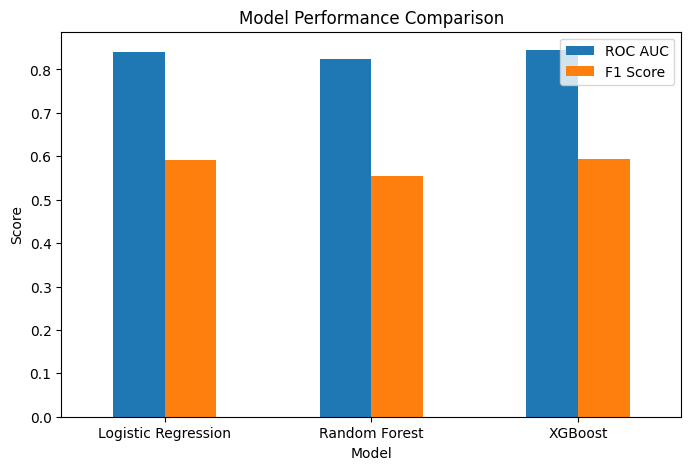

In [21]:
results_df.set_index("Model")[["ROC AUC", "F1 Score"]].plot(
    kind="bar",
    figsize=(8, 5)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [26]:
best_model_name = results_df.sort_values(
    by="ROC AUC", ascending=False
).iloc[0]["Model"]

best_model = models[best_model_name]

best_model_name


'XGBoost'

In [27]:
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



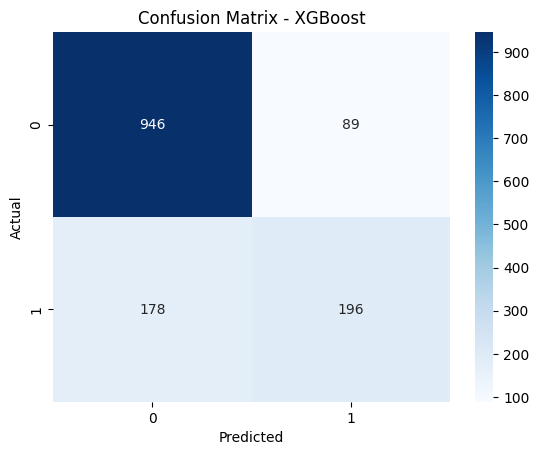

In [28]:
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [25]:
### Model Evaluation Summary

Among the evaluated models, XGBoost achieved the highest ROC-AUC score, 
indicating better ability to distinguish between churned and retained customers. 
While logistic regression offers interpretability, tree-based models 
capture non-linear customer behavior more effectively, 
making XGBoost the preferred choice for this use case.


SyntaxError: invalid syntax (3175459466.py, line 3)

In [27]:
import joblib

joblib.dump(best_model, "../models/churn_model.pkl")
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(label_encoders, "../models/label_encoders.pkl")


['../models/label_encoders.pkl']

In [28]:
import os

os.listdir("../models")


['churn_model.pkl', 'label_encoders.pkl', 'scaler.pkl']

In [42]:
import numpy as np


if not hasattr(np, "int"):
    np.int = int


In [35]:
import shap
import joblib

In [36]:
model = joblib.load("../models/churn_model.pkl")
scaler = joblib.load("../models/scaler.pkl")
label_encoders = joblib.load("../models/label_encoders.pkl")


In [37]:
df = pd.read_csv("../data/processed/churn_cleaned.csv")

X = df.drop("Churn", axis=1)
y = df["Churn"]


In [38]:
X_sample = X.sample(500, random_state=42)


In [39]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


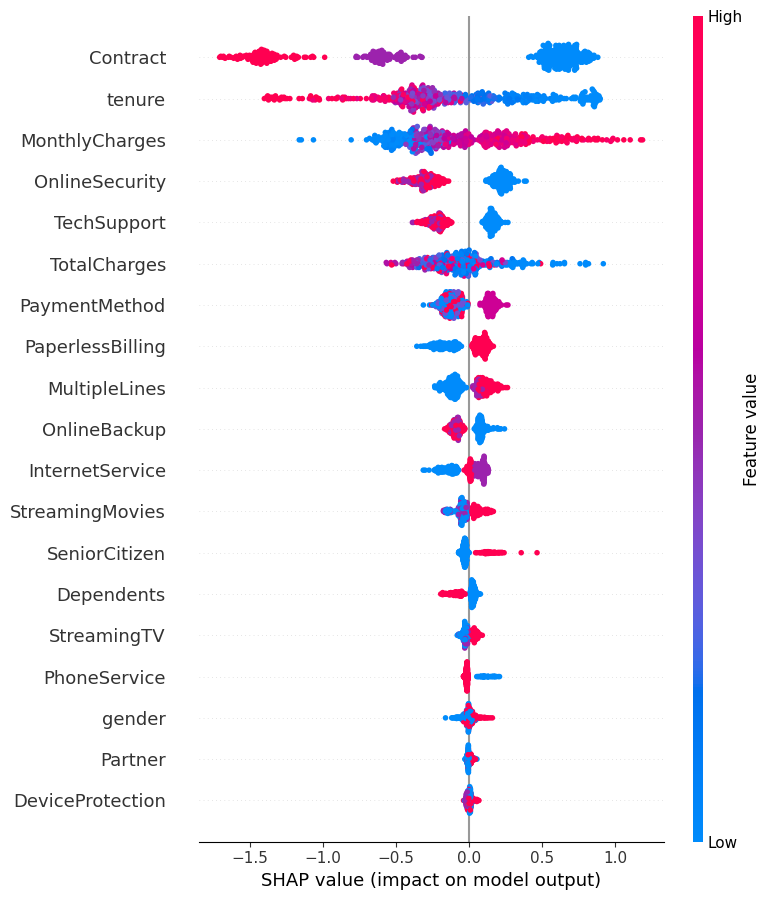

In [40]:
shap.summary_plot(shap_values, X_sample)

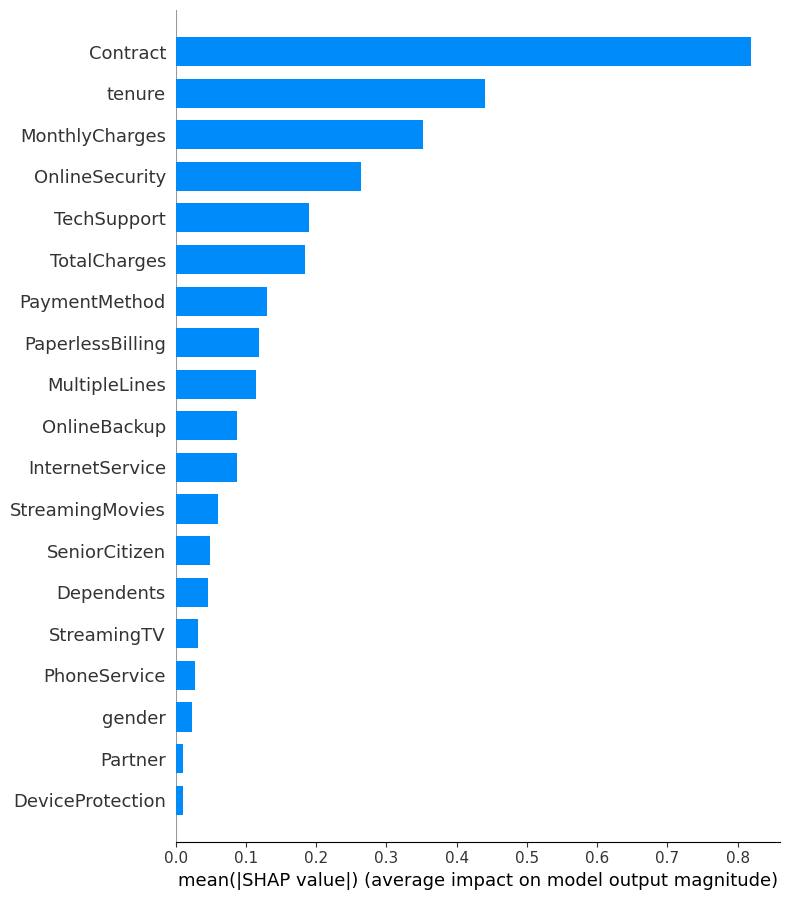

In [50]:
shap.summary_plot(
    shap_values,
    X_sample,
    plot_type="bar"
)


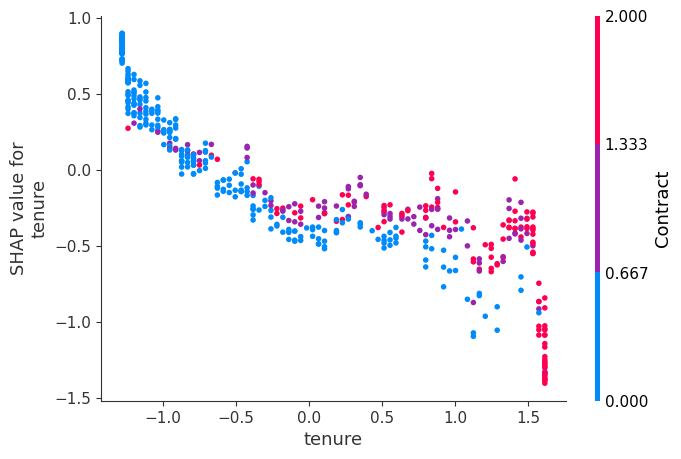

In [41]:
shap.dependence_plot(
    "tenure",
    shap_values,
    X_sample
)


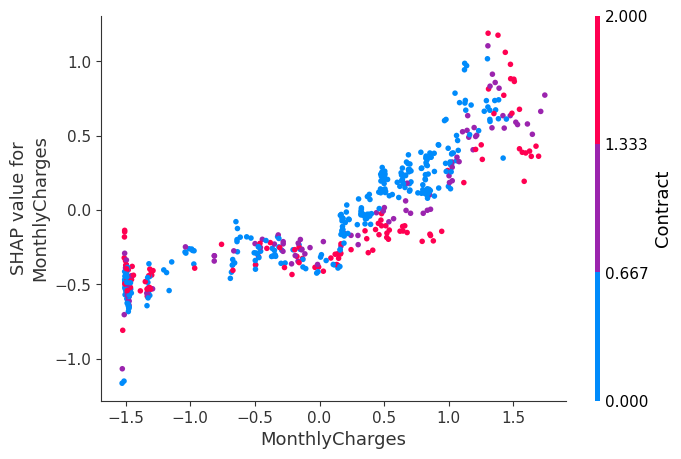

In [42]:
shap.dependence_plot(
    "MonthlyCharges",
    shap_values,
    X_sample
)


In [43]:
index = 0
single_customer = X_sample.iloc[[index]]


In [44]:
shap_value_single = explainer.shap_values(single_customer)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


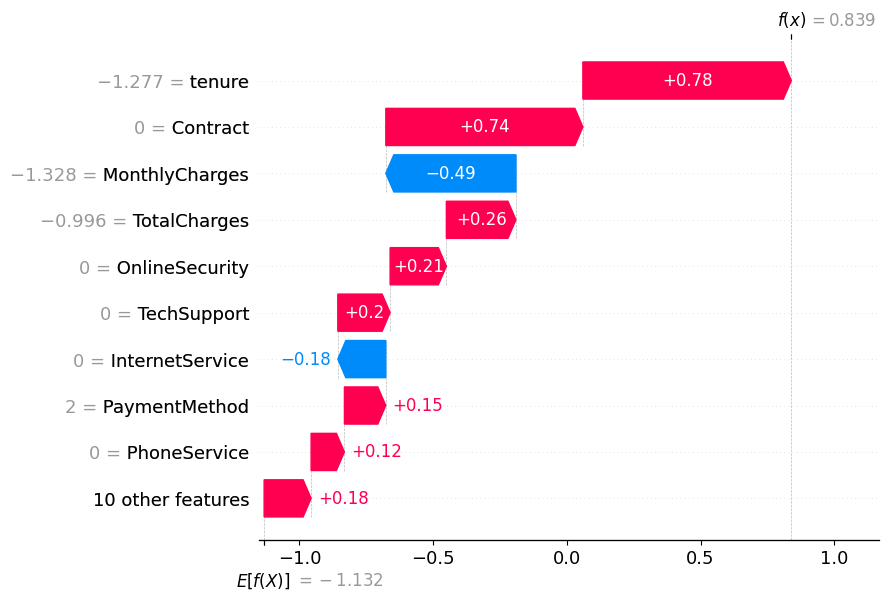

In [45]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_value_single[0],
        base_values=explainer.expected_value,
        data=single_customer.iloc[0],
        feature_names=single_customer.columns
    )
)


In [46]:
shap.initjs()

shap.force_plot(
    explainer.expected_value,
    shap_value_single,
    single_customer
)


In [47]:
import pickle

with open("../models/shap_values.pkl", "wb") as f:
    pickle.dump(shap_values, f)
